Chain([4B:0.375♩, 5A♯:0.375♩, 6D:0.75♩, 5G♯:0.188♩, 5A:0.188♩, 5B:0.188♩, 6C♯:0.188♩, 5A♯:0.188♩, 6C:0.188♩, 6D:0.188♩, …])
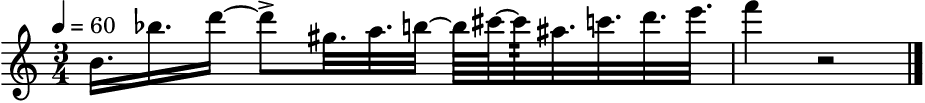

In [1]:
from maelzel.core import *
from maelzel.core import symbols

Workspace.setScoreStruct((3, 4))

chain = Chain([
    Note("4B", F(1, 4)+F(1, 8)),
    Note("5Bb", F(1, 4)+F(1, 8)),
    Note("6D", F(3, 4)),
    
    Note("5G#", F(1, 4)*F(3, 4)),
    Note("5A", F(1, 4)*F(3, 4)),
    Note("5B", F(1, 4)*F(3, 4)),
    
    Note("6C#", F(1, 4)*F(3, 4)),
    Note("5Bb", F(1, 4)*F(3, 4)),
    Note("6C", F(1, 4)*F(3, 4)),
    Note("6D", F(1, 4)*F(3, 4)),
    Note("6E", F(1, 4)*F(3, 4)),

    Note("6F", 1)
    
]).setPlay(instr='.piano')

# chain.addBreak(1)
chain.addSymbolAt(1, symbols.Articulation("accent"))
chain.addSymbolAt(2+F(1,7), 'tremolo')
# chain.eventAt(2+F(1, 7), split=False).addSymbol('tremolo')


chain


Chain([4B:0.375♩, 5A♯:0.375♩, 6D:0.75♩, 5G♯:0.188♩, 5A:0.188♩, 5B:0.188♩, 6C♯:0.188♩, 5A♯:0.188♩, 6C:0.188♩, 6D:0.188♩, …])
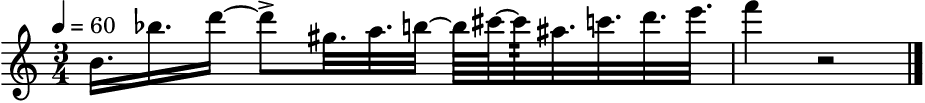

In [2]:
chain2 = chain.copy()
chain2

6D:0.5♩
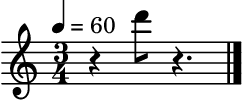

In [3]:
chain2.eventAt(1, split=True)

Chain([4B:0.375♩, 5A♯:0.375♩, 6D~:0.25♩, 6D:0.5♩:symbols=[Beam(anchor=6D, kind=start, uuid=oydfihvf)], 5G♯:0.188♩, 5A:0.188♩, 5B:0.188♩:symbols=[Beam(anchor=5B, kind=end, uuid=oydfihvf)], 6C♯:0.188♩, 5A♯:0.188♩, 6C:0.188♩, …])
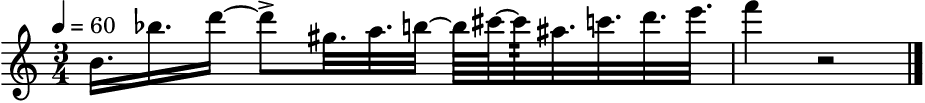

In [4]:
# chain2.eventAt(2.5).addSymbol(symbols.Breath(visible=True, horizontalPlacement='post'))
chain2.eventAt(1, split=True).addSpanner('beam', chain2.eventAt(2))
chain2

[maelzel.scoring:notation.py:465:addAttachment:DEBUG] An attachment of class <class 'maelzel.scoring.attachment.Breath'> already present in this notation, replacing the old one by the new one (Breath(horizontalPlacement=post, placement=above))
[maelzel.scoring:quant.py:1436:quantizeMeasure:DEBUG] Measure 3/4 is not filled (events=[‹r 0:1 1♩ attachments=[Breath(horizontalPlacement=post, placement=above)] properties={'.mergeableNext': False, '.mergeablePrev': False}›]). Filling gaps with silences
[maelzel.scoring:quant.py:822:breakSyncopations:DEBUG] Evaluating split at beat.offset=Fraction(1, 1), beat.duration=Fraction(1, 1), minWeight=1
[maelzel.scoring:quant.py:822:breakSyncopations:DEBUG] Evaluating split at beat.offset=Fraction(2, 1), beat.duration=Fraction(1, 1), minWeight=1
[maelzel.scoring:node.py:954:_splitNotationAtBeat:DEBUG] Found a syncopation but the callback was negative, so «r 1:3 2♩» will not be split
[maelzel.scoring:quant.py:2052:resolveEnharmonics:DEBUG] Resolving enh

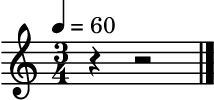

In [6]:
from maelzel.core import *
from maelzel.core import symbols
from maelzel import scoring
scoring.logger.setLevel("DEBUG")

n = Note(0, 1)
n.addSymbol(symbols.Breath(visible=False, horizontalPlacement='post'))
n.show()

In [7]:
from maelzel.core import *
n = Note(0, 1)
print(n.scoringEvents())
n.quantizedScore().dump(tree=True)

[maelzel.scoring:quant.py:1436:quantizeMeasure:DEBUG] Measure 3/4 is not filled (events=[‹r 0:1 1♩ attachments=[Breath(horizontalPlacement=post, placement=above)] properties={'.mergeableNext': False, '.mergeablePrev': False}›]). Filling gaps with silences
[maelzel.scoring:quant.py:822:breakSyncopations:DEBUG] Evaluating split at beat.offset=Fraction(1, 1), beat.duration=Fraction(1, 1), minWeight=1
[maelzel.scoring:quant.py:822:breakSyncopations:DEBUG] Evaluating split at beat.offset=Fraction(2, 1), beat.duration=Fraction(1, 1), minWeight=1
[maelzel.scoring:node.py:954:_splitNotationAtBeat:DEBUG] Found a syncopation but the callback was negative, so «r 1:3 2♩» will not be split
[maelzel.scoring:quant.py:2052:resolveEnharmonics:DEBUG] Resolving enharmonics for measure 0


[‹r 0:1 1♩›]
Part #0:
  Measure #0
    Timesig: 3/4(quarter=60)
    Node ratio: 1/1, offset=0, end=3, dur=3, symbolicdur=3
      «r 0:1 1♩ attachments=[Breath(horizontalPlacement=post, placement=above)]
        properties={'.mergeableNext': False, '.mergeablePrev': False}»
      «r 1:3 2♩»


[maelzel.scoring:quant.py:1436:quantizeMeasure:DEBUG] Measure 3/4 is not filled (events=[‹r 0:1 1♩ attachments=[Breath(horizontalPlacement=post, placement=above)] properties={'.mergeableNext': False, '.mergeablePrev': False}›]). Filling gaps with silences
[maelzel.scoring:quant.py:822:breakSyncopations:DEBUG] Evaluating split at beat.offset=Fraction(1, 1), beat.duration=Fraction(1, 1), minWeight=1
[maelzel.scoring:quant.py:822:breakSyncopations:DEBUG] Evaluating split at beat.offset=Fraction(2, 1), beat.duration=Fraction(1, 1), minWeight=1
[maelzel.scoring:node.py:954:_splitNotationAtBeat:DEBUG] Found a syncopation but the callback was negative, so «r 1:3 2♩» will not be split
[maelzel.scoring:quant.py:2052:resolveEnharmonics:DEBUG] Resolving enharmonics for measure 0
[maelzel.scoring:clefutils.py:228:findBestClefs:DEBUG] No pitched notations given
[maelzel.scoring:renderlily.py:1173:write:DEBUG] Rendering lilypond '/home/em/.cache/tmprw3_5ptu/wfom96ok.ly' to '/home/em/.cache/tmprw3_5p

Rest:1♩
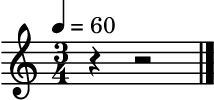

In [8]:
from maelzel.core import *
n = Note(0, 1)
# n.addSymbol(symbols.NoMerge(next=True))
n

[maelzel.scoring:quant.py:1436:quantizeMeasure:DEBUG] Measure 3/4 is not filled (events=[‹r 0:1 1♩›, ‹r 1:1.5 1/2♩ attachments=[Text('foo', placement=above, role=label)]›]). Filling gaps with silences
[maelzel.scoring:quant.py:822:breakSyncopations:DEBUG] Evaluating split at beat.offset=Fraction(1, 1), beat.duration=Fraction(1, 1), minWeight=1
[maelzel.scoring:quant.py:822:breakSyncopations:DEBUG] Evaluating split at beat.offset=Fraction(2, 1), beat.duration=Fraction(1, 1), minWeight=1
[maelzel.scoring:node.py:954:_splitNotationAtBeat:DEBUG] Found a syncopation but the callback was negative, so «r 1:3 2♩» will not be split
[maelzel.scoring:quant.py:822:breakSyncopations:DEBUG] Evaluating split at beat.offset=Fraction(1, 1), beat.duration=Fraction(1, 1), minWeight=1
[maelzel.scoring:quant.py:822:breakSyncopations:DEBUG] Evaluating split at beat.offset=Fraction(2, 1), beat.duration=Fraction(1, 1), minWeight=1
[maelzel.scoring:node.py:954:_splitNotationAtBeat:DEBUG] Found a syncopation bu

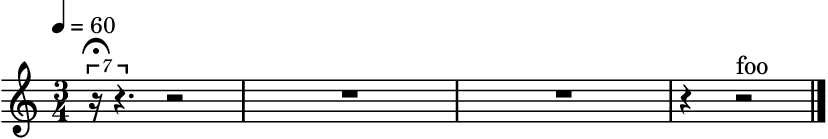

In [10]:
from maelzel.core import *

ch = Chain([Rest(1/7).addSymbol(symbols.Fermata(mergenext=False)), Rest(0.5, offset=10, label='foo')])
# ch.show()
ch.show()